<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# CNN
</div>

* Créer des paires de document (article, highlights)
* Suppression de la ponctuation
* Séparation en token en minuscules
* Suppression des stopwords pour les articles
* Calcul des fréquences et tf-idf sur les deux types de documents
* Enregistrement du nouveau jeu de données d’entraînement pour usage ultérieur

Vous êtes allé jusqu'au bout ? Vérifiez-bien que vous avez les éléments suivants :

* le texte final est tokenisé sans ponctuation et en minuscules à l’aide d’une regex ;
* tous les documents ont été transformés en matrices de valeurs tf-idf calculées sur les paires (articles, highlight).

<div style="display: flex; background-color: Blue; padding: 15px;" >

# Chargement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from os import getcwd, listdir
from os.path import isfile, join
import bs4
import nltk
from ara_nlp_function import *
from collections import defaultdict
import sys
sys.path.append("C:\\Users\\User\\WORK\\workspace-ia\\PERSO\\")
from ara_commons.ara_file import *

In [2]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('omw-1.4')

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_path = file_path+"cnn2\\"
data_path

'c:\\Users\\User\\WORK\\workspace-ia\\simplon\\2022-02-4470541-analysez-vos-donnees-textuelles\\cnn2\\'

In [4]:
fichiers = [f for f in listdir(data_path) if isfile(join(data_path, f)) and f.endswith(".story")]
fichiers

['cnn-story (1).story',
 'cnn-story (10).story',
 'cnn-story (11).story',
 'cnn-story (2).story',
 'cnn-story (3).story',
 'cnn-story (4).story',
 'cnn-story (5).story',
 'cnn-story (6).story',
 'cnn-story (7).story',
 'cnn-story (8).story',
 'cnn-story (9).story']

In [5]:
def get_data_from_page(file_path):
  
    highlights = []
    sentences = ""
    try:
        # Ouvrir le fichier en lecture seule
        file = open(file_path, "r")
        # utiliser readlines pour lire toutes les lignes du fichier
        # La variable "lignes" est une liste contenant toutes les lignes du fichier
        datas = file.read()

        dat = datas.split("@highlight")
        sentences = dat[0].strip()
        sentences = sentences.split("(CNN) -- ")
        if len(sentences) > 1:
            sentences = sentences[1]
        else:
            sentences = sentences[0]
        # Itérer sur les lignes
        for i in range (1, len(dat)):
            
            hig = dat[i].strip()
            if len(hig)>0:
                highlights.append(hig)
    except Exception as error:
        print(file_path, error)
    finally:
        try:
            # fermez le fichier après avoir lu les lignes
            file.close()
        except:
            pass
        
    return (highlights, sentences)

In [6]:
df_origin = pd.DataFrame(columns=['file','highlights','sentences'])

In [7]:
for file in fichiers:
    try:
        highlights, sentences = get_data_from_page(data_path+file)
        new_row = {'file':file,'highlights':highlights, 'sentences':sentences}
        df_origin = df_origin.append(new_row,ignore_index=True, verify_integrity=False)
    except Exception as error:
        print(error)
print(df_origin.shape)
df_origin.head()

(11, 3)


,file,highlights,sentences
0,cnn-story (1).story,[Rory McIlroy shoots a course record at the Sc...,Rory McIlroy is off to a good start at the Sco...
1,cnn-story (10).story,[Africa Fashion Week London was held from Augu...,"Loud music pumps through huge speakers, front ..."
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...


<div style="display: flex; background-color: Blue; padding: 15px;" >

# NLP pre-processing MANUEL

</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

## Version 1
</div>

In [8]:
df_token = token_data(df_origin, 'sentences', "v1_")

In [9]:
df_token["v1_tokens"]

4     [march, 14, is, my, favorite, day, to, be, a, ...
2     [soon, after, i, first, came, to, visit, china...
9     [twitter, is, on, the, verge, of, its, initial...
8     [the, white, house, wednesday, said, it, was, ...
3     [can, a, movie, actually, convince, you, to, s...
5     [families, of, chinese, passengers, on, board,...
1     [loud, music, pumps, through, huge, speakers, ...
10    [the, man, suspected, of, trying, to, attack, ...
0     [rory, mcilroy, is, off, to, a, good, start, a...
6     [the, u, n, security, council, approved, a, re...
7     [a, bipartisan, group, of, women, senators, wa...
Name: v1_tokens, dtype: object

In [10]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
df_token["v1_freq"]

4     {'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...
2     {'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...
9     {'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...
8     {'the': 50, 'white': 11, 'house': 11, 'wednesd...
3     {'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...
5     {'families': 7, 'of': 18, 'chinese': 10, 'pass...
1     {'loud': 1, 'music': 1, 'pumps': 1, 'through':...
10    {'the': 64, 'man': 3, 'suspected': 1, 'of': 15...
0     {'rory': 1, 'mcilroy': 7, 'is': 3, 'off': 2, '...
6     {'the': 24, 'u': 2, 'n': 2, 'security': 3, 'co...
7     {'a': 11, 'bipartisan': 1, 'group': 1, 'of': 5...
Name: v1_freq, dtype: object

In [11]:
df_token.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count'],
      dtype='object')

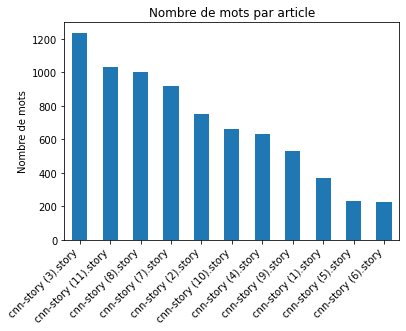

In [12]:
df_token = df_token.sort_values(by=["v1_word_count"], ascending=False)
df_token.plot(kind='bar', x='file', y="v1_word_count", title='Nombre de mots par article',legend=None)
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

In [13]:
df_token[["v1_word_count", "v1_unique_word_count"]]

,v1_word_count,v1_unique_word_count
4,1236,533
2,1033,523
9,1001,488
8,915,394
3,752,360
1,661,326
5,632,328
10,530,261
0,366,201
6,231,142


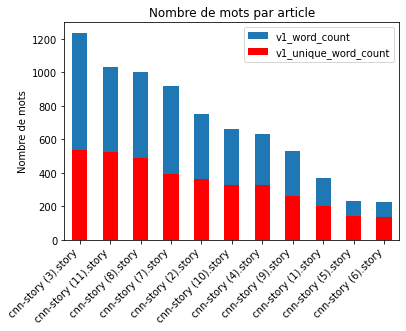

In [14]:
ax = df_token.plot(kind='bar', x='file', y="v1_word_count", title='Nombre de mots par article')
df_token.plot(y="v1_unique_word_count", x='file', kind="bar", ax=ax, color="red")
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

In [15]:
df_token.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",523
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",394
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360


<div style="display: flex; background-color: Blue; padding: 15px;" >

# NLP pre-processing

In [17]:
# import nltk
# nltk.download('punkt') => Déjà fait
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [18]:
df_nlp = df_token.copy()

In [19]:
df_nlp.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count'],
      dtype='object')

<div style="display: flex; background-color: Green; padding: 7px;" >

## NLP - Text Pre-Processing I (Text Cleaning)
</div>

1. Conversion to Lower Case
2. Removing HTML-Tags
3. Removing URLs
4. Removing Accented Characters
5. Removing Punctuation
6. Removing irrelevant Characters (Numbers and Punctuation)
7. Removing extra Whitespaces
8. Extra: Count Words
9. Extra: Expanding Contractions

In [20]:
df_nlp['v2_clean_sentences'] = df_nlp['sentences'].str.lower()
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_html_tags_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_url_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_accented_chars_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_punctuation_func)
# df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_irr_char_func)
df_nlp['v2_clean_sentences'] = df_nlp['v2_clean_sentences'].apply(remove_extra_whitespaces_func)

df_nlp.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",523,soon after i first came to visit china in the ...
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",394,the white house wednesday said it was puzzled ...
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,can a movie actually convince you to support t...


In [21]:
df_nlp = token_data(df_nlp, 'v2_clean_sentences', "v2_")

In [22]:
df_nlp.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",523,soon after i first came to visit china in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",522
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",394,the white house wednesday said it was puzzled ...,"[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",393
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360


In [23]:
print('Average of words counted: ')
print(' - V1 : ' + str(df_nlp['v1_word_count'].mean()))
print(' - V2 : ' + str(df_nlp['v2_word_count'].mean()))
print('Average of words unique counted: ')
print(' - V1 : ' + str(df_nlp['v1_unique_word_count'].mean()))
print(' - V2 : ' + str(df_nlp['v2_unique_word_count'].mean()))
df_nlp.head()


Average of words counted: 
 - V1 : 689.0909090909091
 - V2 : 689.0909090909091
Average of words unique counted: 
 - V1 : 335.8181818181818
 - V2 : 335.54545454545456


,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",523,soon after i first came to visit china in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",522
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",394,the white house wednesday said it was puzzled ...,"[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",393
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360


In [24]:
df_nlp.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count'],
      dtype='object')

In [25]:
df_diff = df_nlp.loc[df_nlp['v1_unique_word_count'] != df_nlp['v2_unique_word_count'], ['file', 'sentences', 'v2_clean_sentences']]
df_diff.shape

(3, 3)

<div style="display: flex; background-color: Green; padding: 7px;" >

## NLP - Text Pre-Processing II (Tokenization and Stop Words)
</div>

1. (Text Cleaning)
1. Tokenization
   1. Word Tokenizer
   1. Sentence Tokenizer
   1. Application to the Example String
   1. Application to the DataFrame
1. Stop Words
   1. Application to the Example String
   1. Application to the DataFrame


In [26]:
df_step3 = df_word_tokenize(df_nlp, 'v2_clean_sentences', "v3_")
df_step3.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count,v3_word_tokenize
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,"[march, 14, is, my, favorite, day, to, be, a, ..."
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",523,soon after i first came to visit china in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",522,"[soon, after, i, first, came, to, visit, china..."
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,"[twitter, is, on, the, verge, of, its, initial..."
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",394,the white house wednesday said it was puzzled ...,"[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",393,"[the, white, house, wednesday, said, it, was, ..."
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,"[can, a, movie, actually, convince, you, to, s..."


In [27]:
df_step3 = token_data(df_step3, 'v2_clean_sentences', "v3_", token_name="v3_word_tokenize")
df_step3.head()

,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count,v3_word_tokenize,v3_word_count,v3_freq,v3_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",523,soon after i first came to visit china in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",522,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",522
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",394,the white house wednesday said it was puzzled ...,"[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",393,"[the, white, house, wednesday, said, it, was, ...",916,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",392
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360


In [28]:
print('Average of words counted: ')
print(' - V1 : ' + str(df_step3['v1_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_word_count'].mean()))
print('Average of words unique counted: ')
print(' - V1 : ' + str(df_step3['v1_unique_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_unique_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_unique_word_count'].mean()))
df_step3.head()

Average of words counted: 
 - V1 : 689.0909090909091
 - V2 : 689.0909090909091
 - V3 : 689.1818181818181
Average of words unique counted: 
 - V1 : 335.8181818181818
 - V2 : 335.54545454545456
 - V3 : 335.45454545454544


,file,highlights,sentences,v1_tokens,v1_word_count,v1_freq,v1_unique_word_count,v2_clean_sentences,v2_tokens,v2_word_count,v2_freq,v2_unique_word_count,v3_word_tokenize,v3_word_count,v3_freq,v3_unique_word_count
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,march 14 is my favorite day to be a nerd acros...,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533,"[march, 14, is, my, favorite, day, to, be, a, ...",1236,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...",533
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",523,soon after i first came to visit china in the ...,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",522,"[soon, after, i, first, came, to, visit, china...",1033,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...",522
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,twitter is on the verge of its initial public ...,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488,"[twitter, is, on, the, verge, of, its, initial...",1001,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...",488
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",394,the white house wednesday said it was puzzled ...,"[the, white, house, wednesday, said, it, was, ...",915,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",393,"[the, white, house, wednesday, said, it, was, ...",916,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...",392
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,can a movie actually convince you to support t...,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360,"[can, a, movie, actually, convince, you, to, s...",752,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...",360


<div style="display: flex; background-color: indigo;" >

### Stop WORDS
</div>

In [29]:
if verbose > 0:
    print(stopwords.words("english"))

In [30]:
df_step3.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count', 'v3_word_tokenize',
       'v3_word_count', 'v3_freq', 'v3_unique_word_count'],
      dtype='object')

In [31]:
df_step3['v3_word_tokenize'].head()

4    [march, 14, is, my, favorite, day, to, be, a, ...
2    [soon, after, i, first, came, to, visit, china...
9    [twitter, is, on, the, verge, of, its, initial...
8    [the, white, house, wednesday, said, it, was, ...
3    [can, a, movie, actually, convince, you, to, s...
Name: v3_word_tokenize, dtype: object

In [32]:
df_step3["StopWordLess"] = df_step3['v3_word_tokenize'].apply(lambda x: remove_english_stopwords_func(x))
df_step3 = token_data(df_step3, 'v2_clean_sentences', "v4_", token_name="StopWordLess")
print(df_step3.shape, df_step3.columns)
df_step3[['file','v1_word_count', 'v2_word_count', 'v3_word_count', 'v4_word_count', 
                'v1_unique_word_count', 'v2_unique_word_count',  'v3_unique_word_count', 'v4_unique_word_count', 
                'v2_freq', 'v3_freq', 'v4_freq']].head()

(11, 20) Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count', 'v3_word_tokenize',
       'v3_word_count', 'v3_freq', 'v3_unique_word_count', 'StopWordLess',
       'v4_word_count', 'v4_freq', 'v4_unique_word_count'],
      dtype='object')


,file,v1_word_count,v2_word_count,v3_word_count,v4_word_count,v1_unique_word_count,v2_unique_word_count,v3_unique_word_count,v4_unique_word_count,v2_freq,v3_freq,v4_freq
2,cnn-story (11).story,1033,1033,1033,632,523,522,522,448,"{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...","{'soon': 2, 'after': 4, 'i': 4, 'first': 4, 'c...","{'soon': 2, 'first': 4, 'came': 2, 'visit': 1,..."
4,cnn-story (3).story,1236,1236,1236,717,533,533,533,441,"{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...","{'march': 4, '14': 11, 'is': 19, 'my': 1, 'fav...","{'march': 4, '14': 11, 'favorite': 1, 'day': 3..."
9,cnn-story (8).story,1001,1001,1001,566,488,488,488,405,"{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...","{'twitter': 8, 'is': 16, 'on': 6, 'the': 41, '...","{'twitter': 8, 'verge': 1, 'initial': 1, 'publ..."
8,cnn-story (7).story,915,915,916,502,394,393,392,312,"{'the': 50, 'white': 11, 'house': 11, 'wednesd...","{'the': 50, 'white': 11, 'house': 11, 'wednesd...","{'white': 11, 'house': 11, 'wednesday': 1, 'sa..."
3,cnn-story (2).story,752,752,752,405,360,360,360,292,"{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...","{'can': 8, 'a': 15, 'movie': 6, 'actually': 1,...","{'movie': 6, 'actually': 1, 'convince': 1, 'su..."


In [33]:
print('Average of words counted: ')
print(' - V1 : ' + str(df_step3['v1_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_word_count'].mean()))
print(' - V4 : ' + str(df_step3['v4_word_count'].mean()))
print('Average of words unique counted: ')
print(' - V1 : ' + str(df_step3['v1_unique_word_count'].mean()))
print(' - V2 : ' + str(df_step3['v2_unique_word_count'].mean()))
print(' - V3 : ' + str(df_step3['v3_unique_word_count'].mean()))
print(' - V4 : ' + str(df_step3['v4_unique_word_count'].mean()))

Average of words counted: 
 - V1 : 689.0909090909091
 - V2 : 689.0909090909091
 - V3 : 689.1818181818181
 - V4 : 392.54545454545456
Average of words unique counted: 
 - V1 : 335.8181818181818
 - V2 : 335.54545454545456
 - V3 : 335.45454545454544
 - V4 : 271.6363636363636


<div style="display: flex; background-color: Green; padding: 7px;" >

## NLP - Text Pre-Processing III (POS, NER and Normalization)
</div>

1. Digression: POS & NER
1. Part of Speech Tagging (POS)
1. Named Entity Recognition (NER)


In [34]:
df_step3.columns

Index(['file', 'highlights', 'sentences', 'v1_tokens', 'v1_word_count',
       'v1_freq', 'v1_unique_word_count', 'v2_clean_sentences', 'v2_tokens',
       'v2_word_count', 'v2_freq', 'v2_unique_word_count', 'v3_word_tokenize',
       'v3_word_count', 'v3_freq', 'v3_unique_word_count', 'StopWordLess',
       'v4_word_count', 'v4_freq', 'v4_unique_word_count'],
      dtype='object')

In [35]:
df_step4 = df_step3.copy()
df_step4 = df_step4[['file', 'highlights', 'sentences', 'StopWordLess', 'v4_word_count', 'v4_freq', 'v4_unique_word_count']]
print(df_step4.shape, df_step4.columns)
df_step4.head()

(11, 7) Index(['file', 'highlights', 'sentences', 'StopWordLess', 'v4_word_count',
       'v4_freq', 'v4_unique_word_count'],
      dtype='object')


,file,highlights,sentences,StopWordLess,v4_word_count,v4_freq,v4_unique_word_count
2,cnn-story (11).story,[Mao proved to be good at fighting but poor at...,Soon after I first came to visit China in the ...,"[soon, first, came, visit, china, autumn, 1971...",632,"{'soon': 2, 'first': 4, 'came': 2, 'visit': 1,...",448
4,cnn-story (3).story,[Math geeks and others celebrate Pi Day every ...,March 14 is my favorite day to be a nerd.\n\nA...,"[march, 14, favorite, day, nerd, across, count...",717,"{'march': 4, '14': 11, 'favorite': 1, 'day': 3...",441
9,cnn-story (8).story,"[Soraya Chemaly: Twitter, on verge of IPO, is ...",Twitter is on the verge of its initial public ...,"[twitter, verge, initial, public, offering, ev...",566,"{'twitter': 8, 'verge': 1, 'initial': 1, 'publ...",405
8,cnn-story (7).story,"[NEW: ""This is not the Scott we knew,"" White H...","The White House Wednesday said it was ""puzzled...","[white, house, wednesday, said, puzzled, forme...",502,"{'white': 11, 'house': 11, 'wednesday': 1, 'sa...",312
3,cnn-story (2).story,[Dean Obeidallah: A movie or TV show can educa...,Can a movie actually convince you to support t...,"[movie, actually, convince, support, torture, ...",405,"{'movie': 6, 'actually': 1, 'convince': 1, 'su...",292


In [36]:
df_step4.columns

Index(['file', 'highlights', 'sentences', 'StopWordLess', 'v4_word_count',
       'v4_freq', 'v4_unique_word_count'],
      dtype='object')

<div style="display: flex; background-color: indigo;" >

### Part of Speech Tagging (POS)
</div>

In [37]:
df_step4["pos_tag"] = df_step4['StopWordLess'].apply(lambda x: pos_tag(x))
df_step4["pos_tag"]

2     [(soon, RB), (first, RB), (came, VBD), (visit,...
4     [(march, NN), (14, CD), (favorite, JJ), (day, ...
9     [(twitter, NN), (verge, NN), (initial, JJ), (p...
8     [(white, JJ), (house, NN), (wednesday, NN), (s...
3     [(movie, NN), (actually, RB), (convince, JJ), ...
5     [(families, NNS), (chinese, JJ), (passengers, ...
1     [(loud, JJ), (music, NN), (pumps, NNS), (huge,...
10    [(man, NN), (suspected, VBD), (trying, VBG), (...
0     [(rory, NN), (mcilroy, NN), (good, JJ), (start...
6     [(u, JJ), (n, JJ), (security, NN), (council, N...
7     [(bipartisan, JJ), (group, NN), (women, NNS), ...
Name: pos_tag, dtype: object

<div style="display: flex; background-color: indigo;" >

### Named Entity Recognition (NER)
</div>

In [38]:
# NER_tree = ne_chunk(pos_tag(word_tokenize(pos_ner_text)))
df_step4["NER_tree"] = df_step4['pos_tag'].apply(lambda x: ne_chunk(x))
df_step4["NER_tree"]

2     [(soon, RB), (first, RB), (came, VBD), (visit,...
4     [(march, NN), (14, CD), (favorite, JJ), (day, ...
9     [(twitter, NN), (verge, NN), (initial, JJ), (p...
8     [(white, JJ), (house, NN), (wednesday, NN), (s...
3     [(movie, NN), (actually, RB), (convince, JJ), ...
5     [(families, NNS), (chinese, JJ), (passengers, ...
1     [(loud, JJ), (music, NN), (pumps, NNS), (huge,...
10    [(man, NN), (suspected, VBD), (trying, VBG), (...
0     [(rory, NN), (mcilroy, NN), (good, JJ), (start...
6     [(u, JJ), (n, JJ), (security, NN), (council, N...
7     [(bipartisan, JJ), (group, NN), (women, NNS), ...
Name: NER_tree, dtype: object

<div style="display: flex; background-color: indigo;" >

### Normalization - Stemming
</div>


* `Stemming` :  reducing words to their root or root form. Here, stemming algorithms work by cutting off the beginning or end of a word, taking into account a list of common prefixes and suffixes. However, this random cutting does not always work. Therefore, this approach has some limitations.

In [39]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
print("Original Word: 'studies' ")
print()
print('With Stemming: ' + str(stemmer.stem("studies")))
print('with Lemmatization: ' + str(lemmatizer.lemmatize("studies")))

Original Word: 'studies' 

With Stemming: studi
with Lemmatization: study


In [40]:
# NER_tree = ne_chunk(pos_tag(word_tokenize(pos_ner_text)))
df_step4["Stemming"] = df_step4['StopWordLess'].apply(lambda x: norm_stemming_func(x))
df_step4["Stemming"]

2     [soon, first, came, visit, china, autumn, 1971...
4     [march, 14, favorit, day, nerd, across, countr...
9     [twitter, verg, initi, public, offer, everyon,...
8     [white, hous, wednesday, said, puzzl, former, ...
3     [movi, actual, convinc, support, tortur, movi,...
5     [famili, chines, passeng, board, miss, malaysi...
1     [loud, music, pump, huge, speaker, front, row,...
10    [man, suspect, tri, attack, dutch, royal, fami...
0     [rori, mcilroy, good, start, scottish, open, h...
6     [u, n, secur, council, approv, resolut, monday...
7     [bipartisan, group, women, senat, wade, ongo, ...
Name: Stemming, dtype: object

<div style="display: flex; background-color: indigo;" >

### Normalization - Lemmatization
</div>

* `Lemmatization` : words are reduced to their base word. The lemmatization algorithms try to reduce the inflected words correctly so that the affiliation of the base word to the language is guaranteed.

In [41]:
# NER_tree = ne_chunk(pos_tag(word_tokenize(pos_ner_text)))
df_step4["Lemmatization"] = df_step4['StopWordLess'].apply(lambda x: norm_lemm_func(x))
df_step4["Lemmatization"]

2     [soon, first, came, visit, china, autumn, 1971...
4     [march, 14, favorite, day, nerd, across, count...
9     [twitter, verge, initial, public, offering, ev...
8     [white, house, wednesday, said, puzzled, forme...
3     [movie, actually, convince, support, torture, ...
5     [family, chinese, passenger, board, missing, m...
1     [loud, music, pump, huge, speaker, front, row,...
10    [man, suspected, trying, attack, dutch, royal,...
0     [rory, mcilroy, good, start, scottish, open, h...
6     [u, n, security, council, approved, resolution...
7     [bipartisan, group, woman, senator, waded, ong...
Name: Lemmatization, dtype: object

In [42]:
df_step4["Lemmatization_pos_v"] = df_step4['StopWordLess'].apply(lambda x: norm_lemm_v_func(x))
df_step4["Lemmatization_pos_v"]

2     [soon, first, come, visit, china, autumn, 1971...
4     [march, 14, favorite, day, nerd, across, count...
9     [twitter, verge, initial, public, offer, every...
8     [white, house, wednesday, say, puzzle, former,...
3     [movie, actually, convince, support, torture, ...
5     [families, chinese, passengers, board, miss, m...
1     [loud, music, pump, huge, speakers, front, row...
10    [man, suspect, try, attack, dutch, royal, fami...
0     [rory, mcilroy, good, start, scottish, open, h...
6     [u, n, security, council, approve, resolution,...
7     [bipartisan, group, women, senators, wad, ongo...
Name: Lemmatization_pos_v, dtype: object

In [43]:
df_step4["Lemmatization_pos_a"] = df_step4['StopWordLess'].apply(lambda x: norm_lemm_a_func(x))
df_step4["Lemmatization_pos_a"]

2     [soon, first, came, visit, china, autumn, 1971...
4     [march, 14, favorite, day, nerd, across, count...
9     [twitter, verge, initial, public, offering, ev...
8     [white, house, wednesday, said, puzzled, forme...
3     [movie, actually, convince, support, torture, ...
5     [families, chinese, passengers, board, missing...
1     [loud, music, pumps, huge, speakers, front, ro...
10    [man, suspected, trying, attack, dutch, royal,...
0     [rory, mcilroy, good, start, scottish, open, h...
6     [u, n, security, council, approved, resolution...
7     [bipartisan, group, women, senators, waded, on...
Name: Lemmatization_pos_a, dtype: object

In [44]:
df_step4["Lemmatization_all"] = df_step4['StopWordLess'].apply(lambda x: norm_lemm_POS_tag_func(x))
df_step4["Lemmatization_all"]

2     [soon, first, come, visit, china, autumn, 1971...
4     [march, 14, favorite, day, nerd, across, count...
9     [twitter, verge, initial, public, offering, ev...
8     [white, house, wednesday, say, puzzle, former,...
3     [movie, actually, convince, support, torture, ...
5     [family, chinese, passenger, board, miss, mala...
1     [loud, music, pump, huge, speaker, front, row,...
10    [man, suspect, try, attack, dutch, royal, fami...
0     [rory, mcilroy, good, start, scottish, open, h...
6     [u, n, security, council, approve, resolution,...
7     [bipartisan, group, woman, senator, wad, ongoi...
Name: Lemmatization_all, dtype: object

In [45]:
df_step4['Word_Count_Lemmatization_all'] = df_step4['Lemmatization_all'].apply(lambda x: nltk.FreqDist(x))
df_step4['Word_Count_Lemmatization_all']

2     {'soon': 2, 'first': 4, 'come': 3, 'visit': 1,...
4     {'march': 4, '14': 11, 'favorite': 1, 'day': 3...
9     {'twitter': 8, 'verge': 1, 'initial': 1, 'publ...
8     {'white': 11, 'house': 11, 'wednesday': 1, 'sa...
3     {'movie': 10, 'actually': 1, 'convince': 1, 's...
5     {'family': 8, 'chinese': 10, 'passenger': 2, '...
1     {'loud': 1, 'music': 1, 'pump': 1, 'huge': 1, ...
10    {'man': 3, 'suspect': 1, 'try': 2, 'attack': 4...
0     {'rory': 1, 'mcilroy': 7, 'good': 5, 'start': ...
6     {'u': 2, 'n': 2, 'security': 3, 'council': 3, ...
7     {'bipartisan': 1, 'group': 1, 'woman': 2, 'sen...
Name: Word_Count_Lemmatization_all, dtype: object

In [46]:
df_step4['Count_Word_Lemmatization_all'] = df_step4['Word_Count_Lemmatization_all'].apply(lambda x: words_by_weight(x))
df_step4['Count_Word_Lemmatization_all']

2     {23: ['china'], 14: ['mao'], 10: ['people'], 9...
4     {53: ['pi'], 31: ['day'], 12: ['digit'], 11: [...
9     {24: ['woman'], 10: ['company'], 8: ['twitter'...
8     {19: ['mcclellan'], 16: ['say'], 15: ['bush'],...
3     {15: ['film'], 10: ['movie'], 8: ['torture'], ...
5     {10: ['chinese'], 8: ['family', 'malaysian'], ...
1     {13: ['say'], 9: ['designer'], 7: ['fashion'],...
10    {10: ['family'], 9: ['royal'], 8: ['say', 'que...
0     {7: ['mcilroy', 'well'], 6: ['open'], 5: ['goo...
6     {6: ['sudan'], 5: ['resolution', 'abyei'], 3: ...
7     {7: ['nfl'], 4: ['ray', 'rice'], 3: ['senator'...
Name: Count_Word_Lemmatization_all, dtype: object

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from os import getcwd, listdir
from os.path import isfile, join
import bs4
import nltk
from ara_nlp_function import *
from collections import defaultdict
import sys
sys.path.append("C:\\Users\\User\\WORK\\workspace-ia\\PERSO\\")
from ara_commons.ara_file import *

<div style="display: flex; background-color: Blue; padding: 15px;" >

# ANNEXES

In [47]:
just to fail

SyntaxError: invalid syntax (693838000.py, line 1)

In [46]:
def get_data_from_page_old(file_path):
  
    # Ouvrir le fichier en lecture seule
    file = open(file_path, "r")
    # utiliser readlines pour lire toutes les lignes du fichier
    # La variable "lignes" est une liste contenant toutes les lignes du fichier
    lines = file.readlines()
    # fermez le fichier après avoir lu les lignes
    file.close()

    highlights = []
    next_high = False
    sentences = ""

    # Itérer sur les lignes
    for line in lines:
        if "@highlight" in line:
            next_high = True
            continue
        str = line.strip()
        if len(str)>0:
            if next_high:
                highlights.append(line.strip())
            else:
                sentences += line.strip() + " "
        
    return (highlights, sentences)

In [ ]:
# nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True